In [133]:
import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from PIL import Image

In [134]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [135]:
transform = torchvision.transforms.Compose(transforms=[
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize(size=(500, 500)),
    torchvision.transforms.ToTensor(),
    # torchvision.transforms.Normalize(mean=0.5, std=0.5)
])

In [136]:
def get_translation_matrix(trans_x, trans_y, device):
    zeros = torch.zeros_like(input=trans_x).to(device)
    ones = torch.ones_like(input=trans_x).to(device)
    identical = torch.stack(tensors=[ones, zeros, trans_x, zeros, ones, trans_y]).view(2,3)
    return identical

In [137]:
def translate_img(x, trans_x, trans_y, device):
    translation_mat = get_translation_matrix(trans_x=trans_x, trans_y=trans_y, device=device).unsqueeze(dim=0).repeat(x.shape[0],1,1)    # repeat for whole batch
    grid = F.affine_grid(theta=translation_mat, size=x.size(), align_corners=False)
    x = F.grid_sample(input=x, grid=grid, align_corners=False)
    return x

In [138]:
im = read_image('images/dog_cat.jpg')
im = transform(im)
# print(im)

In [139]:
im.requires_grad = True
im = im.unsqueeze(dim=0)

<Figure size 432x288 with 0 Axes>

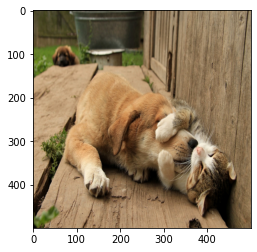

<Figure size 432x288 with 0 Axes>

In [140]:
plt.imshow(im.detach().cpu().squeeze(0).permute(1,2,0))
plt.figure()

In [145]:
trans_X = torch.FloatTensor([2*400/500]).to(device)
trans_X.requires_grad=True
trans_Y = torch.FloatTensor([2*400/500]).to(device)
trans_Y.requires_grad=True

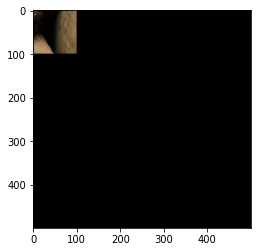

In [146]:
#Scale by 1/2 with autograd support:
trans_im = translate_img(x=im.to(device), trans_x=trans_X, trans_y=trans_Y, device=device)
plt.imshow(trans_im.detach().cpu().squeeze(0).permute(1,2,0))

In [148]:
loss = torch.mean((im.to(device)-trans_im.to(device))**2)

In [149]:
loss.backward()

In [150]:
trans_X.grad

tensor([0.0237], device='cuda:0')

In [151]:
trans_Y.grad

tensor([0.0253], device='cuda:0')

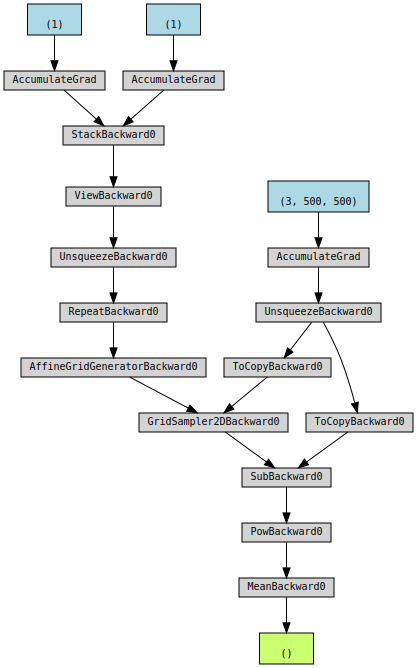

In [152]:
from torchviz import make_dot
make_dot(loss)